<a href="https://colab.research.google.com/github/oseibrefo/cwttriGAN/blob/main/cwt_triGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# example of fitting an auxiliary classifier gan (ac-gan) on fashion mnsit
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
%tensorflow_version 1.x
from numpy import zeros
from numpy import ones
import numpy as np
import pandas as pd
from numpy import expand_dims
from numpy.random import randn
from numpy.random import randint
from keras.datasets.fashion_mnist import load_data
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import Concatenate
from keras.models import Sequential, Model
from keras.initializers import RandomNormal
from matplotlib import pyplot
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D, LSTM
import math
import sys
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
#import pandas_datareader as pdr
import pywt
from keras import regularizers
import os
import pywt
#from wavelets.wave_python.waveletFunctions import *
import itertools

from scipy.fftpack import fft
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from google.colab import drive

import pandas_datareader.data as pdr

#yf.pdr_override()
drive.mount('/content/drive')
#%cd content/drive/My Drive/

In [ ]:
cd/content/drive/My Drive/time

In [ ]:
from LoadData import  garch_data_loading,  Gan_Data_loading, cwfGan_Data_loading1, dwtGan_Data_loading, GBPUSDX_data_loading #Data_loading,cwfGan_Data_loading
from tsgan import tgan
from tsgan1 import tgan1
from tsgan3 import tgan3
from tsgan4 import tgan4
import sys
from metrics import discriminative_score_metrics, predictive_score_metrics, PCA_Analysis, tSNE_Analysis
from metrics1 import discriminative_score_metrics1, predictive_score_metrics1, PCA_Analysis, tSNE_Analysis
from metrics3 import discriminative_score_metrics3, predictive_score_metrics3, PCA_Analysis, tSNE_Analysis
from metrics4 import discriminative_score_metrics4, predictive_score_metrics4, PCA_Analysis, tSNE_Analysis
#pip install yfinance
import yfinance as yf
from datetime import datetime
import pandas_datareader.data as pdr
yf.pdr_override()

[*********************100%***********************]  1 of 1 completed
FX POUNDS-DOLLAR dataset with used time step of:30 steps is ready
CWF test GAN loaded


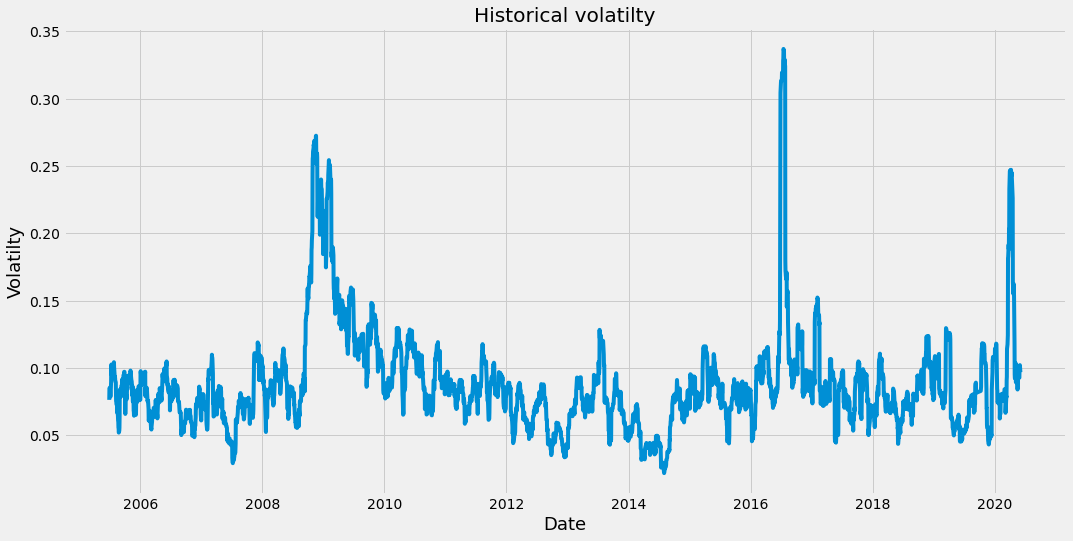

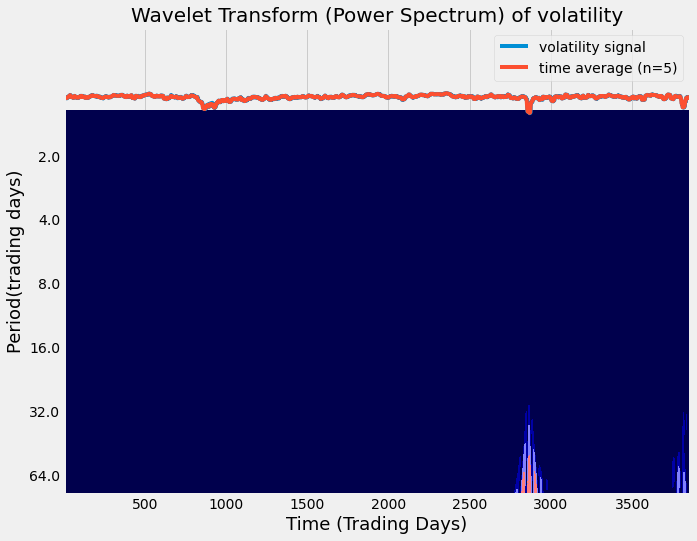

(64, 3857, 1)
(3827, 30, 64)
(0,)


In [ ]:

#%% Main Parameters

# Experiments iterations
Iteration = 1
Sub_Iteration = 1

#%% time Data Loading
time=[1,5,21,30,60]
n_steps = time[3]

from datetime import datetime
start_date = '01-06-2005'
end_date = '01-06-2020'

start = datetime.strptime(start_date, '%d-%m-%Y')
end = datetime.strptime(end_date, '%d-%m-%Y')

# Data
datasource=['yahoo reader', 'CSV_reader']
data=datasource[0]
if data=='CSV_reader':
    df=pd.read_csv('./SP500.csv', index_col=0, delimiter = ",")
    data_set1 = [ 'GOOG','AAPL','ULVR.L', 'AMZN', 'GHS=X','GBPUSD=X', 'FTAS', 'CL=F', 'sp500']
    data_name = data_set1[8]
elif data == 'yahoo reader' :
    data_set = ['GOOG','AAPL','ULVR.L', 'AMZN', 'GHS=X','GBPUSD=X', 'FTAS', 'CL=F']
    data_name = data_set[5]
    df=pdr.DataReader(data_name, data_source='yahoo', start=start, end=end)# start='2005-06-01', end='2020-06-01')

if data_name == 'GOOG':
      print('GOOGLE dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')          
elif data_name == 'AAPL':
     print('APPLE dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')
elif data_name == 'ULVR.L':
     print('UNILEVER dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')
elif data_name == 'AMZN':
     print('AMAZON dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')
elif data_name == 'GHS=X':
     print('US DOLLAR-GHANA CEDIS FX dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')
elif data_name == 'GBPUSD=X':
     print('FX POUNDS-DOLLAR dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')
elif data_name == 'FTAS':
     print('FTSE ALL index dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')
elif data_name == 'CL=F':
      print('Crude oil dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF test GAN loaded')
elif data_name == 'sp500':
      print('S and P 500 dataset with used time step of:' +str(n_steps), 'steps is ready'), print('CWF dataset GAN loaded')

def cwfGan_Data_loading(df, n_steps):
      def AVoality(x):
          
        x['daily_returns'] = np.log(x['Adj Close']).diff()            # Daily log returns
        x['Volatility']= x['daily_returns'].rolling(21).std()
        volality=x
        x=volality*np.sqrt(252)
        return(volality*np.sqrt(252));
      dfV=AVoality(df).dropna()
      dfV
      #visualise volatilty history
      plt.figure(figsize=(16,8))
      plt.title('Historical volatilty')
      plt.plot(dfV['Volatility'])
      plt.xlabel('Date', fontsize=18)
      plt.ylabel('Volatilty', fontsize=18)
      plt.show()
      #create a new dataframe with only the close column
      dataset1=dfV.filter(['Volatility'])
      scaler=MinMaxScaler(feature_range=(0,1))
      dataset2=scaler.fit_transform(dataset1)

      training_data_len = int(len(dataset2)*1 )
      train_data, test_data = dataset2[0:training_data_len], dataset2[training_data_len:len(dataset2)]
      #dataset0=train_data


      import pywt
      #df_nino = dataset
      N = dataset1.shape[0]
      t0=1
      dt=1
      time = np.arange(0, N) * dt + t0
      volatility = dataset1.values.squeeze()
      def get_ave_values(xvalues, yvalues, n = 5):
            signal_length = len(xvalues)
            if signal_length % n == 0:
                padding_length = 0
            else:
                padding_length = n - signal_length//n % n
            xarr = np.array(xvalues)
            yarr = np.array(yvalues)
            xarr.resize(signal_length//n, n)
            yarr.resize(signal_length//n, n)
            xarr_reshaped = xarr.reshape((-1,n))
            yarr_reshaped = yarr.reshape((-1,n))
            x_ave = xarr_reshaped[:,0]
            y_ave = np.nanmean(yarr_reshaped, axis=1)
            return x_ave, y_ave

      def plot_signal_plus_average(ax, time, volatility, average_over = 5):
            time_ave, signal_ave = get_ave_values(time, volatility, average_over)
            ax.plot(time, volatility, label='volatility signal')
            ax.plot(time_ave, signal_ave, label = 'time average (n={})'.format(5))
            ax.set_xlim([time[0], time[-1]])
            ax.set_ylabel('Amplitude', fontsize=16)
            ax.set_title('Volatility  + Time Average', fontsize=16)
            ax.legend(loc='upper right')

      fig, ax = plt.subplots(figsize=(10,8))
      plot_signal_plus_average(ax, time, volatility, average_over = 3) 
      
      
      widths = np.arange(1, 65)  
      #scales= 64
      scales = np.arange(1, 65)  
      
      #dataset, cD1 = pywt.cwt(dataset1, widths, 'morl')
      
    
      dt = time[1] - time[0]
      [coefficients, frequencies] = pywt.cwt(volatility, widths, 'morl', dt)
      dataset, cD1 = pywt.cwt(train_data, scales, 'morl')
      power = (abs(coefficients)) ** 2
      period = 1. / frequencies
      levels = [0.0625, 0.125, 0.25,0.5,1]
      contourlevels = np.log2(levels)
    
      im = ax.contourf(time, np.log2(period), np.log2(power), contourlevels, extend='both',cmap=plt.cm.seismic)
      title = 'Wavelet Transform (Power Spectrum) of volatility'
      ylabel = 'Period(trading days)'
      xlabel = 'Time (Trading Days)'
      ax.set_title(title, fontsize=20)
      ax.set_ylabel(ylabel, fontsize=18)
      ax.set_xlabel(xlabel, fontsize=18)
    
      yticks = 2**np.arange(np.ceil(np.log2(period.min())), np.ceil(np.log2(period.max())))
      ax.set_yticks(np.log2(yticks))
      ax.set_yticklabels(yticks)
      ax.invert_yaxis()
      ylim = ax.get_ylim()
      ax.set_ylim(ylim[0], -1)
      #fig, ax = plt.subplots(figsize=(10, 8))
      #plot_wavelet(ax, time, volatility, scales, xlabel=xlabel, ylabel=ylabel, title=title)
      plt.show()
      print(dataset.shape)

      #scaler=MinMaxScaler(feature_range=(0,1))
      #dataset2=scaler.fit_transform(dataset)
      #reshape data
      #nsamples, nx, ny = dataset.shape
      dataset = dataset.reshape((dataset.shape[1],dataset.shape[0], dataset.shape[2]))
      #Scale the data
      #scaler=MinMaxScaler(feature_range=(0,1))
      #scaled_data=scaler.fit_transform(dataset)
      #scaled_data.shape
      
      dataset1a = []
        
        # Cut data by sequence length
      for i in range(0, len(dataset) - n_steps):
            _dataset = dataset[i:i + n_steps]
            dataset1a.append(_dataset)
      dataset1a=np.array(dataset1a)

      #test data
      test_dataset1a = []
      for i in range(0, len(test_data) - n_steps):
            _dataset = test_data[i:i + n_steps]
            test_dataset1a.append(_dataset)
      #from sklearn.decomposition import PCA
      #pca = PCA(n_components=10)
          #pca = PCA(0.99, whiten=True)
      #dataset1 = pca.fit_transform(dataset1)
      test_dataset1a=np.array(test_dataset1a)
      #training_data_len = int(len(dataset1) * 0.8)
      #train_data, test_data = dataset1[0:training_data_len], dataset1[training_data_len:len(dataset1)]
      dataset1a = dataset1a.reshape((dataset1a.shape[0],dataset1a.shape[1]*dataset1a.shape[3], dataset1a.shape[2]))
      print(dataset1a.shape)

      print(test_dataset1a.shape)
      #print(test_data.shape)
      return (dataset1a, test_dataset1a,  scaler )

dataX, test_data, scaler=cwfGan_Data_loading(df, n_steps)


Parameters are{'hidden_dim': 256, 'num_layers': 4, 'iterations': 15000, 'batch_size': 32, 'module_name': 'lstm', 'z_dim': 64}




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argu

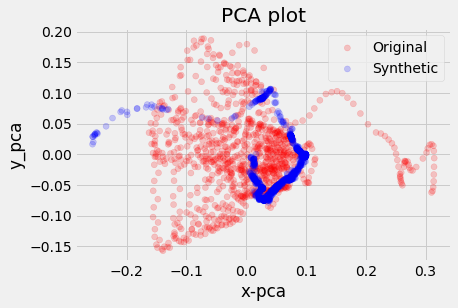

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.007s...
[t-SNE] Computed neighbors for 2000 samples in 0.243s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.011593
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.950409
[t-SNE] KL divergence after 300 iterations: 0.613069


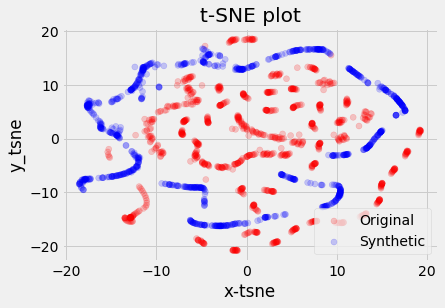

Discriminative Score - Mean: 0.4966, Std: 0.0
Predictive Score MAE- Mean: 0.018, Std: 0.0
Predictive Score RMSE - Mean: 0.0276, Std: 0.0
Predictive Score MSE - Mean: 0.001, Std: 0.0
Predictive Score Euclidist - Mean: 0.1484, Std: 0.0


In [ ]:
#%% Newtork Parameters
import utils
parameters = dict()
parameters['hidden_dim'] = len(dataX[0][0,:]) * 4
parameters['num_layers'] = 4
parameters['iterations'] = 15000
parameters['batch_size'] = 32
parameters['module_name'] = 'lstm'   # Other options: 'lstm' or 'lstmLN'
parameters['z_dim'] = len(dataX[0][0,:]) 


#%% Experiments
# Output Initialization
Discriminative_Score = list()
Predictive_Score = list()
Predictive_Score_rmse = list()
Predictive_Score_mse = list()
Predictive_Score_Euclidist = list()

print('Parameters are' + str(parameters))
import time
startTime=time.time()
#dataloader.load_real_samples()

# Each Iteration
for it in range(Iteration):
    #dataX = pca.inverse_transform(dataX)
    # Synthetic Data Generation
    dataX_hat = tgan(dataX, parameters) 
    #y_hat = tgan(np.array(y_train), parameters)
   # print ('new shape of data hat' + str(dataX_hat.shape))  
   
    print('Finish Synthetic Data Generation')

    #%% Performance Metrics
    
    # 1. Discriminative Score
    Acc = list()
    for tt in range(Sub_Iteration):
        Temp_Disc, Accuracy = discriminative_score_metrics (dataX, dataX_hat)
        Acc.append(Temp_Disc)
    
    Discriminative_Score.append(np.mean(Acc))
    
    # 2. Predictive Performance
    MAE, RMSE, MSE, Euclidist=predictive_score_metrics (dataX, dataX_hat)
    MAE_All = list()
    for tt in range(Sub_Iteration):
        MAE_All.append(MAE)
        
    Predictive_Score.append(np.mean(MAE_All)) 

    RMSE_All = list()
    for tt in range(Sub_Iteration):
        RMSE_All.append(RMSE)
        
    Predictive_Score_rmse.append(np.mean(RMSE_All)) 

    MSE_All = list()
    for tt in range(Sub_Iteration):
        MSE_All.append(MSE)

    Predictive_Score_mse.append(np.mean(MSE_All))
    
    Euclidist_All = list()
    for tt in range(Sub_Iteration):
        Euclidist_All.append(Euclidist)
        
    Predictive_Score_Euclidist.append(np.mean(Euclidist_All))      
#save data as csv
#dataX_hat.to_csv('./dataX_hat_goog.csv', encoding='utf-8')
#dataX.to_csv('./dataX_goog.csv', encoding='utf-8')

#MAE_All

#trainX, trainX_hat, testX, testX_hat, trainT, testT
#Y_pred_final
#Y_label_final
#pred_Y_curr
#Disc_Score, Y_real, Y_fake, Y_Pred_real, Y_Pred_fake, Y_pred_real_curr, Y_pred_fake_curr= discriminative_score_metrics (dataX, dataX_hat)       



'''MAE, Y_pred=predictive_score_metrics (dataX, dataX_hat)   
MAE   
pred_Y_curr ''' 


#%% 3. Visualization
PCA_Analysis (dataX, dataX_hat)
tSNE_Analysis (dataX, dataX_hat)

# Print Results
print('Discriminative Score - Mean: ' + str(np.round(np.mean(Discriminative_Score),4)) + ', Std: ' + str(np.round(np.std(Discriminative_Score),4)))
print('Predictive Score MAE- Mean: ' + str(np.round(np.mean(Predictive_Score),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score),4)))
print('Predictive Score RMSE - Mean: ' + str(np.round(np.mean(Predictive_Score_rmse),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score_rmse),4)))
print('Predictive Score MSE - Mean: ' + str(np.round(np.mean(Predictive_Score_mse),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score_mse),4)))
print('Predictive Score Euclidist - Mean: ' + str(np.round(np.mean(Predictive_Score_Euclidist),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score_Euclidist),4)))

excecutionTime=(time.time()-startTime)
#print('Execution time in seconds:'+ str(executionTime))
